In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from tqdm import tqdm


def reference(x): #la densité de référence à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)



#Partie 1
#Question 1

#Uniform Kernel
#K(x) = 1/2 if x<1 and x>-1 else 0
def K1(x):
    return np.where((x < 1) & (x > -1), 1/2, 0)

#Triangular kernel
#K(x) = 1-|x| if x<1 and x>-1 else 0
def K2(x):
    return np.where((x < 1) & (x > -1), 1-np.abs(x), 0)
    
        
#Epanechnikov kernel
#K(x) = 3/4(1-x^2) if x<1 and x>-1 else 0
def K3(x):
    return np.where((x < 1) & (x > -1), 3/4*(1-x**2), 0)
        
#Gaussian kernel
#K(x) = 1/(sqrt(2*pi))*exp(-x^2/2)
def K4(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

#how to import tqdm




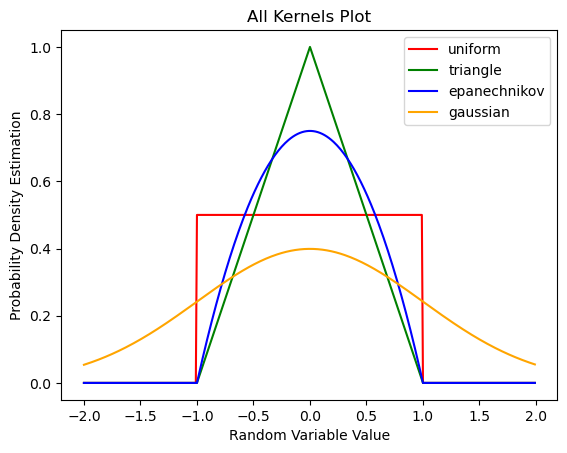

In [4]:


#Question 2
def AllplotK(step,xmin,xmax,col1,col2,col3,col4):

            """
            Plot all kernels in the same graph
            step: step between each point
            xmin: minimum value of x
            xmax: maximum value of x
            colors: list of colors for each kernel
            """
            plt.title('All Kernels Plot')
            colors = [col1, col2, col3, col4]
            kernels = [K1, K2, K3, K4]
            legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
            x = np.arange(xmin, xmax, step)
            for i in range(len(kernels)):
                plt.plot(x, kernels[i](x), colors[i], label = legends[i])
                
            plt.legend()
            plt.xlabel('Random Variable Value')
            plt.ylabel('Probability Density Estimation')
            plt.show()
     


AllplotK(0.01,-2,2,'r','g','b','orange')

In [5]:
#Question 3
#Generate a realization of the random sample X according to the standard
#Gaussian distribution of size n. (n is currently set to 100 in the script).
n=100
X= np.random.normal(0,1,n)

X

array([-0.63049105,  0.27553619, -1.36078528, -0.16878222, -0.44630323,
       -0.59445002,  0.06956805,  1.02781409,  0.60019015,  0.74239868,
       -0.53988081, -2.77367925,  0.18322454,  2.16637037,  0.86710805,
        1.35354799, -0.78268868,  0.35313691,  2.60834326, -0.67731346,
       -0.75089673,  0.55371676,  0.84978189, -0.85072839, -0.83149527,
       -0.41884442, -0.46355759, -1.50849939,  0.36575924,  3.12247164,
       -0.32343037, -0.59765529, -1.1548474 ,  1.05448401, -1.08809656,
        0.38333326,  1.17515813, -0.39112652, -1.07015281, -0.59373024,
       -0.82945412,  0.7531546 ,  1.3454905 , -0.51230054,  0.48075837,
        1.1549687 ,  1.27636239, -1.29469776,  0.5514488 ,  0.01294904,
       -1.48143921, -0.06226023,  0.3116106 ,  0.81926185,  0.15927559,
       -0.1395257 ,  0.58399961, -0.42154934, -1.21300583,  0.86603485,
        0.02427825,  1.4948847 ,  0.06414443,  0.49889765, -1.37066554,
        1.30023689, -1.78867025,  0.19560517, -1.40524756,  0.73

In [ ]:

#Question 4
#write a function fhat that Estimates the density f(here the standard Gaussian, for a window h, at the point x for the kernel func)
#if x is an array, the function will return an array of the same size appliying the function over each element of x

def fhat(kernel,h,x,sample):
    return (1/len(sample))*sum(((1/h)*kernel((x-sample)/h)))

#X= np.random.normal(0,1,1000)
#arrange=np.arange(-2,2,0.01)

#fhat(K1,2,0.5,X)
print(reference(0))
fhat(K1,2,0,X)


In [ ]:
#Question 5
#The function below plots the estimated density fhat for a given kernel, a given window h and a given point x
#The function also plots the reference density f


def Allplotfhath2(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='All fhat Plot'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        x = np.arange(xmin, xmax, step)
        fhats = [fhat(kernels[i],2,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.show()

Allplotfhath2(-2,2,0.01,'r','g','b','orange','purple')


In [ ]:

#Question 6
#The funciont Allplotfhath1 is the same as Allplotfhath2 but the windows size
#we use when calling fhat is 1 instead of 2

def Allplotfhath1(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='Kernels reference functions'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        fhats = [fhat(kernels[i],1,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.show()

Allplotfhath1(-2,2,0.01,'r','g','b','orange','purple')

In [ ]:
#Question 7

n10 = np.random.normal(0,1,10)
n100 = np.random.normal(0,1,100)
n1000 = np.random.normal(0,1,1000)

#We need to make four graphs. One using Allplotfhath1 and the other using Allplotfhath2
#each one on a different sample n10 and n1000. We will use the same colors for each
#kernel in each graph, so that we can compare them easily. And give a title to each graph
#like this: "n = 100, h = 2" For example


# Graph 1(n, h) =(10, 2)
# Graph 2(n, h) =(10, 1)
# Graph 3(n, h) =(1000, 2)
# Graph 3(n, h) =(1000, 1)



Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 2')
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 1')
Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 2')
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 1')




In [ ]:

#Question 8

def SCE(kernel,h,f):
    """
    kernel: kernel function
    h: window size
    f: reference function
    """
    sample = np.random.normal(0,1,500)
    x = np.arange(-5, 5, 0.02)

    #fhat vector
    fhats = [fhat(kernel,h,p,sample) for p in x]

    #reference vector
    ref = [f(p) for p in x]

    #SCE vector
    SCEvec = sum([(fhats[i] - ref[i])**2 for i in range(len(x))])
    return SCEvec

print(['uniform', 'triangle', 'epanechnikov', 'gaussian'])
for i,kernel in enumerate([K1, K2, K3, K4]):
    print("K"+str(i+1)+":" ,SCE(kernel,2,reference))

In [ ]:
#Question 9

def thebesth(kernel,f,):
    #Add documentation describing input and output
    """
    kernel: kernel function
    f: reference function
    """
    #Create a list of the SCE values for each h
    h_candidates = []
    for i in range(1,201):
        h_candidates.append(SCE(kernel,i/100,f))

    #Find the index of the minimum value in the list
    min_index = h_candidates.index(min(h_candidates))
    return min_index/100

thebesth(K2,reference)

In [ ]:
#Question 10

def Allplotfhathoptimal(xmin,xmax,step,col1,col2,col3,col4,colref,samplesize=1000,title='Best h for each kernel'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['Uniform', 'Triangle', 'Epanechnikov', 'Gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        x = np.arange(xmin, xmax, step)
        besth = thebesth(kernels[i],reference)
        fhats = [fhat(kernels[i],besth,p,np.random.normal(0,1,samplesize)) for p in x]
        plt.plot(x, fhats, colors[i], label = (legends[i]+", h = "+str(besth)))
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.legend()
    #Add labels to the x and y axis
  
    plt.show()


Allplotfhathoptimal(-3,3,0.8,'r','g','b','orange','purple',samplesize=10)
#Allplotfhathoptimal(-3,3,0.01,'r','g','b','orange','purple',samplesize=100)
#Allplotfhathoptimal(-3,3,0.01,'r','g','b','orange','purple',samplesize=1000)

#What are the axis of a PDF plot? What are the names?
#Answer: 



In [ ]:
def density_estimation(N,h,mu1,sigma1,mu2,sigma2):
        # generate the sample from two normal distributions
     
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # prepare the points where we will calculate the density
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # prepare to display the true density, which is the one from
         # from which the data was generated (see above)
         # the weighting of the distributions in the sum is the weighting of the distributions
         # in generated sample (see above)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # density estimation by Gaussian kernels
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)   


        # density calculation for X_plot data
        density = np.exp(kde.score_samples(X_plot))

        # display: true density and estimate
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()           